# Name : Mahjabeen Mohiuddin

### Model : Building a Supervised Machine Learning classification model for analyzing telecom customer behavior and predicting the likelihood of churn, and then saving the model using joblib.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder,StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree  import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import joblib

In [3]:
df_chrun = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df_chrun.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [26]:
print("The dimension of telecom customer behaviour dataset are:", df_chrun.shape)

The dimension of telecom customer behaviour dataset are: (7043, 20)


### Determining the column names of dataframe

In [5]:
df_chrun.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Assessing whether any not a null values present in the dataframe or not to impute them.

In [6]:
df_chrun.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Dropping Identifier from the dataframe to avoid biasness in the model training.

In [7]:
df_chrun = df_chrun.drop(columns='customerID', axis= 1)
df_chrun

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## Exploratory Data Analysis

Text(0.5, 1.0, 'Customer churn analysis')

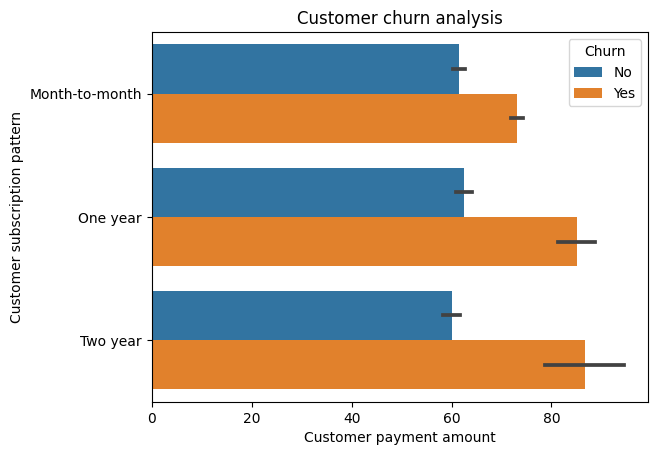

In [8]:
sn.barplot(x='MonthlyCharges', y='Contract', data=df_chrun, hue="Churn", orient = 'h')
plt.xlabel("Customer payment amount")
plt.ylabel("Customer subscription pattern")
plt.title("Customer churn analysis")

### Creating a count plot to analyse the 'PhoneService' customers count.

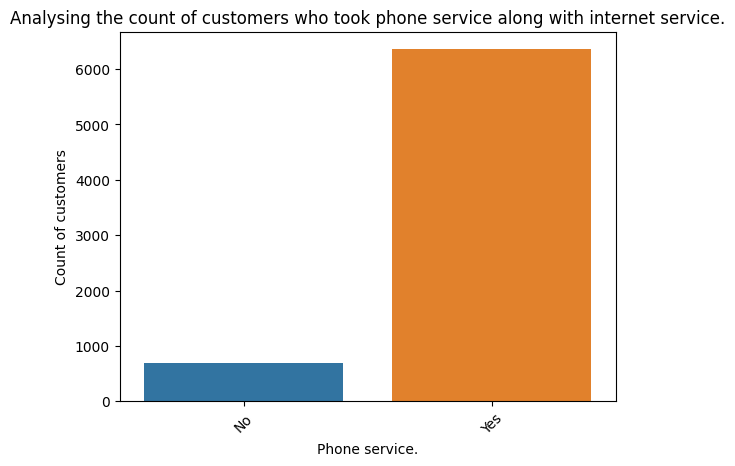

In [9]:
sn.countplot(x="PhoneService", data=df_chrun)
plt.title("Analysing the count of customers who took phone service along with internet service.")
plt.xlabel("Phone service.")
plt.ylabel("Count of customers")
plt.xticks(rotation=45)
plt.show()



### Converting the "TotalCharges" column to numerical format

In [10]:
df_chrun['TotalCharges'] = pd.to_numeric(df_chrun['TotalCharges'], errors='coerce')

### Assigning independent variables to X and dependent variabel to Y.

In [11]:
X = df_chrun.drop(columns='Churn', axis=1)
Y = df_chrun['Churn']

### Splitting data into train and test set with 0.8:0.2 ratio.

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

### Encoding the target variable using LabelEncoder

In [13]:
label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(Y_train)
Y_test_encoded = label_encoder.fit_transform(Y_test)

### Assigning the numerical columns to variable num_cols and categorical columns to variable cat_cols.

In [14]:
num_cols = ['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']
cat_cols = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']

### Initializing the numerical and categorical preprocessor and also imputing the missing values with most frequent value of the column.

In [15]:

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()) 
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), 
    ('encoder', OrdinalEncoder())  
])

### Initializing preprocessor for columntransformer.

In [16]:
preprocessor = ColumnTransformer(
    transformers =[
        ('num', numerical_transformer,num_cols),
        ('cat', categorical_transformer, cat_cols)
    ]
)

### Creating a pipeling for preprocessor and classifier model.

In [17]:
ada_pipeline = Pipeline(steps = [
            ('preprocessor', preprocessor),
            ('ada', AdaBoostClassifier(random_state=42))
])

### Fitting pipeline

In [18]:
churn_pipe = ada_pipeline.fit(X_train, Y_train_encoded)

/Users/mahjabeenmohiuddin/.pyenv/versions/3.9.13/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


### Performing prediction on train data to check the performance of the model.

In [19]:
x_pred = churn_pipe.predict(X_train)

In [20]:
accuracy_train = accuracy_score(Y_train_encoded, x_pred)
print(f"The train set accuracy score of churn rate model is: {accuracy_train:.2f}")

The train set accuracy score of churn rate model is: 0.81


### Performing prediction on test data to analyse how well the model is functioning on unseen data.

In [21]:
y_pred = churn_pipe.predict(X_test)

In [22]:
accuracy = accuracy_score(Y_test_encoded, y_pred)

print(f"The test set accuracy score of churn rate model is: {accuracy:.2f}")

The test set accuracy score of churn rate model is: 0.80


In [23]:
print(classification_report(Y_test_encoded, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1036
           1       0.66      0.53      0.59       373

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409



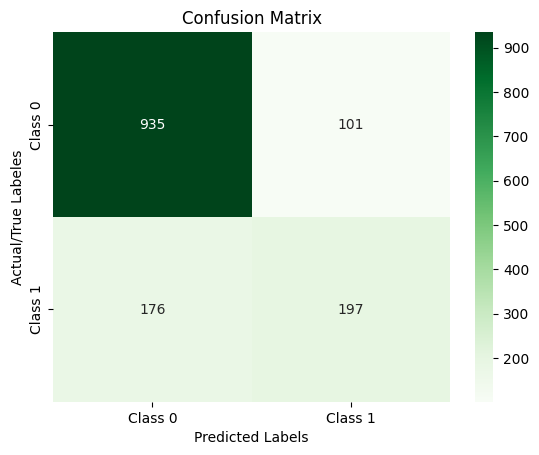

In [24]:
cm=confusion_matrix(Y_test_encoded, y_pred)
plt.Figure(figsize=(8,6))
sn.heatmap(cm, annot=True, fmt='d', cmap='Greens',
           xticklabels=['Class 0', 'Class 1'],
           yticklabels=['Class 0', 'Class 1'])

plt.xlabel("Predicted Labels")
plt.ylabel("Actual/True Labeles")
plt.title("Confusion Matrix")
plt.show()

## Result explanation of Confusion Matrix
#### True Positives (TP): 197

##### 197 cases where the actual class is Class 1, and the model also predicted Class 1.

#### False Negatives (FN): 176

##### 176 cases where the actual class is Class 1, but the model predicted Class 0.

#### False Positives (FP): 101
##### 101 cases where the actual class is Class 0, but the model predicted Class 1.

#### True Negatives (TN): 935
##### 935 cases where the actual class is Class 0, and the model also predicted Class 0.

## Model is well generalized on the unseen data, and therefore, model is being saved using joblib.

In [25]:
joblib.dump(churn_pipe,"/Volumes/DriveB/LinkedIn_Models/churn_model.json")

['/Volumes/DriveB/LinkedIn_Models/churn_model.json']

#### https://www.kaggle.com/code/farazrahman/telco-customer-churn-logisticregression/notebook